#     COURSE: Linear algebra: theory and implementation
##    SECTION: Quadratic form and definiteness

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg


---
# VIDEO: The quadratic form in algbebra
---


In [14]:
# matrix and vector
S = [ [ 1,  3, -2], 
      [ 0,  3,  4],
      [-5, -2,  4] ]

w = np.transpose([ [-2, 4, 3] ])  # tranpose to make w a column vector

# compute the quadratic form
qf = w.T@S@w

print(qf)

[[130]]


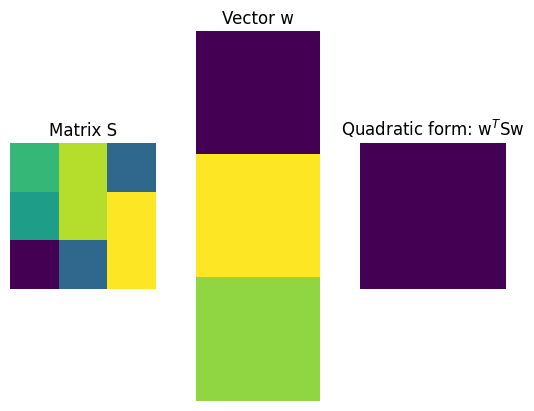

In [15]:
n = len(w) # used for plotting

# show the matrices
plt.subplot(131)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qf)
plt.title('Quadratic form: w$^T$Sw')
plt.axis('off')

plt.show()


---
# VIDEO: The quadratic form in geometry
---


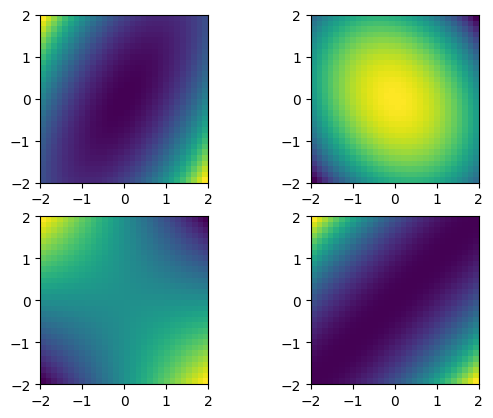

In [16]:
# some different matrices
# S = np.zeros((4,), dtype=np.object)
S = np.zeros((4,), dtype=object)

S[0] = [ [ 4, 4], [4, 9] ]
S[1] = [ [-4,-1], [3,-5] ]
S[2] = [ [ 0, 1], [2, 0] ]
S[3] = [ [ 1, 1], [1, 1] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )


for i in range(4):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])  # list -> numpy.array then tranpose
            
            # QF
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf,extent=[wRange[0],wRange[-1],wRange[0],wRange[-1]])

plt.show()

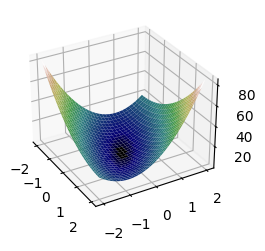

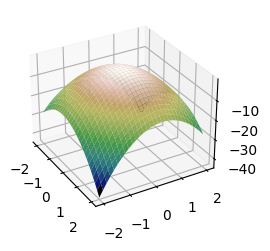

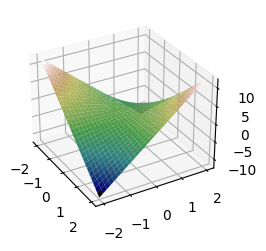

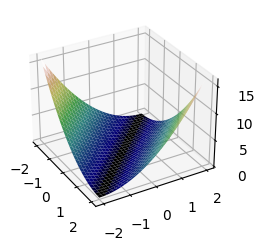

In [17]:
# 3D plotting code

mycmap = plt.get_cmap('gist_earth')
X,Y = np.meshgrid(wRange,wRange)

for i in range(4):
    
    for xi in range(n):
        for yi in range(n):
            w = np.array([ wRange[xi], wRange[yi] ])
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map 
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i, projection='3d')
    surf1 = ax1.plot_surface(X, Y, qf.T, cmap=mycmap)
    ax1.view_init(azim=-30, elev=30)

plt.show()

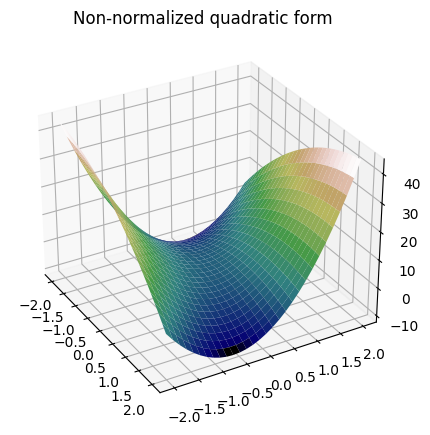

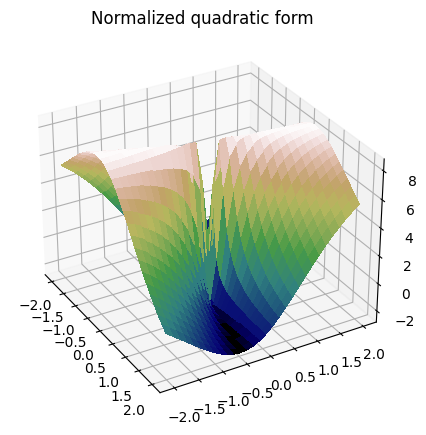

In [25]:
# Code challenge: Visualize the normalized quadratic form

# compute and visualize the normalized quadratic form

A = np.array([[-2,3],[2,8]])
# A = np.array([[1,1], [1,1]])

n = 30
xi = np.linspace(-2,2,n)

# for the visualization
X,Y = np.meshgrid(xi,xi)

# initialize
qf  = np.zeros((n,n))
qfN = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        # create x (coordinate) vector, column vector
        x = np.transpose([ xi[i],xi[j] ])

        # compute the quadratic forms
        qf[i,j]  = x.T@A@x
        qfN[i,j] = qf[i,j] / (x.T@x)  # normalized quadratic forms


fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X, Y, qf.T, cmap=mycmap)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Non-normalized quadratic form')

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X, Y, qfN.T, cmap=mycmap, antialiased=False)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Normalized quadratic form')

plt.show()


---
# VIDEO: Eigenvectors and the quadratic form surface
---


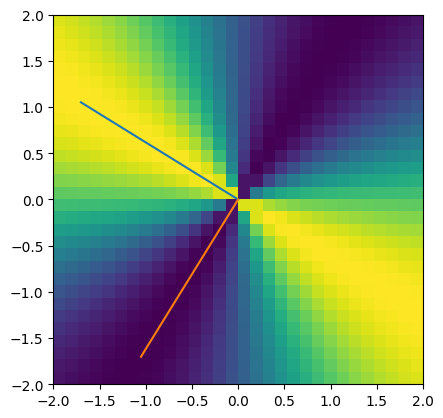

In [26]:
# a happy little symmetric matrix
A = [ [1,2],[2,3] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )

# compute QF
for xi in range(n):
    for yi in range(n):
        # this w
        w = np.transpose([ wRange[xi], wRange[yi] ])  # transpose to make it a column vector

        # QF
        qf[xi,yi] = w.T@A@w / (w.T@w)

# compute eigendecomposition
D,V = np.linalg.eig(A)

# scale up eigenvectors just for the visualization
V = V*2

# show the surface
plt.imshow(qf,extent=[-2,2,-2,2])

# show the eigenvectors
plt.plot( [0,V[0,0]],[0,V[1,0]]  )
plt.plot( [0,V[0,1]],[0,V[1,1]]  )
plt.show()



---
VIDEO: Application of the normalized quadratic form: PCA
---


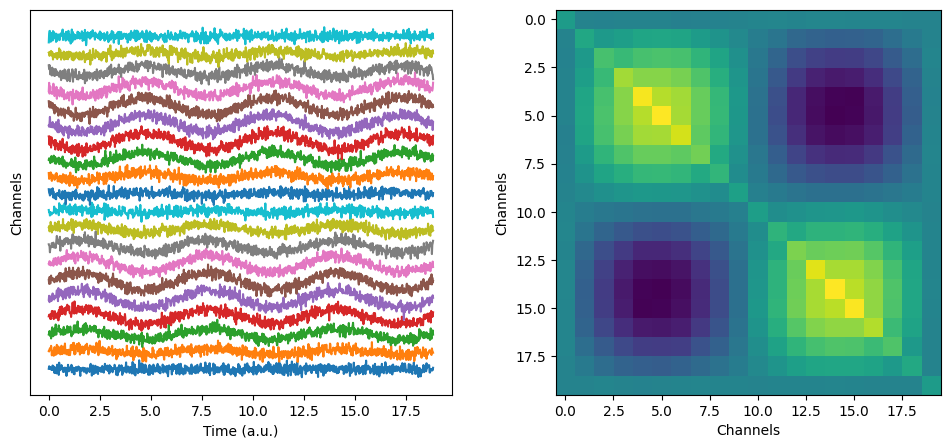

In [27]:
# simulation parameters
N = 1000 # time points
M =   20 # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# initialize data
data = np.zeros((M,N))

# create dataset
for i in range(M):
    data[i,:] = np.sin(t) * chanrel[i]

# add noise
data = data + np.random.randn(M,N)/3
    
# mean-center
for i in range(M):
    data[i,:] = data[i,:] - np.mean(data[i,:])


# compute covariance matrix
covmat = data@data.T/(N-1)  # N-1 degrees of freedom, gives space covariance (channel by channel) matrix
# covmat = data.T@data/(N-1)  # it gives time covariance matrix


### show me the data!!
fig,ax = plt.subplots(1,2,figsize=(12,5))

# draw time series
for i in range(M):
    ax[0].plot(t,data[i,:]+i*2)
ax[0].set_yticks([])
ax[0].set_ylabel('Channels')
ax[0].set_xlabel('Time (a.u.)')

# show covariance matrix
ax[1].imshow(covmat)
ax[1].set_ylabel('Channels')
ax[1].set_xlabel('Channels')


plt.show()

/var/folders/km/13wrqb_j6v3dc86n898dncd00000gn/T/ipykernel_3032/1498069484.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


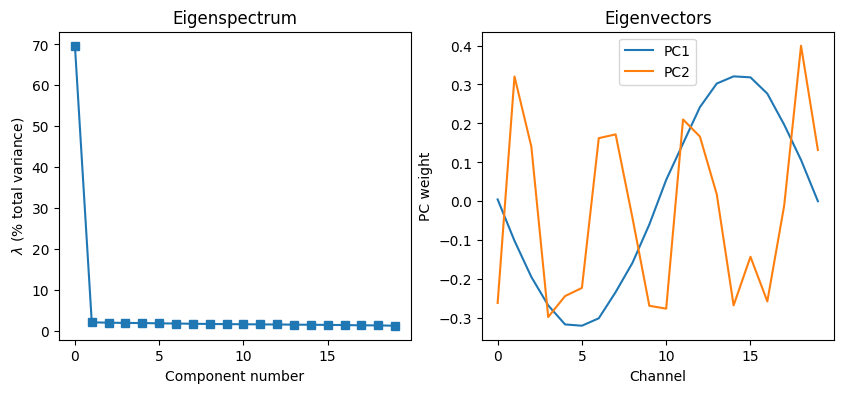

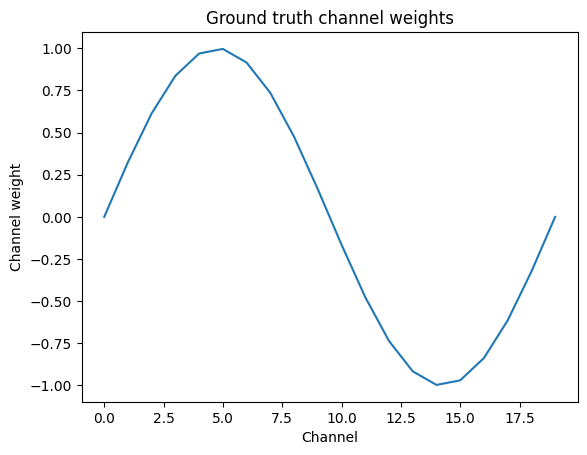

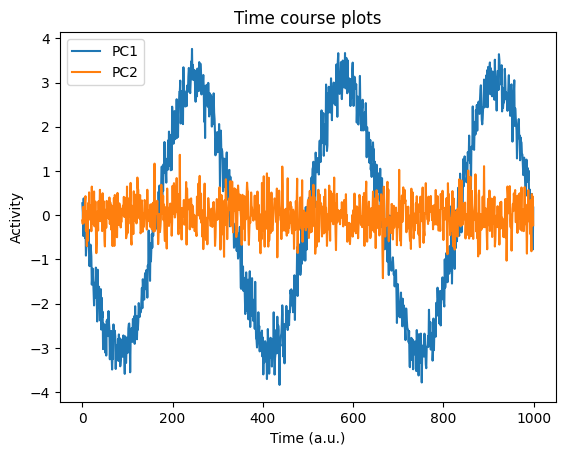

In [28]:
# eigendecomposition of the covariance matrix
evals,evecs = np.linalg.eig( covmat )

# sort eigenvalues and eigenvectors
idx   = np.argsort(evals)[::-1]   
evals = np.real( evals[idx] )
evecs = evecs[:,idx]

# convert eigenvalues to percent variance explained
evals = 100*evals/np.sum(evals)

# compute component time series
r = 2 # two components
comp_time_series = evecs[:,:r].T@data

# visualize and interpret the results
fig = plt.subplots(121,figsize=(10,4))
# eigenvalues
plt.subplot(121)
plt.plot(evals,'s-')
plt.xlabel('Component number')
plt.ylabel('$\lambda$ (% total variance)')
plt.title('Eigenspectrum')

# eigenvectors
plt.subplot(122)
plt.plot(evecs[:,0],label='PC1')
plt.plot(evecs[:,1],label='PC2')
plt.xlabel('Channel')
plt.ylabel('PC weight')
plt.title('Eigenvectors')
plt.legend()
plt.show()

# original channel modulator
plt.plot(chanrel)
plt.xlabel('Channel')
plt.ylabel('Channel weight')
plt.title('Ground truth channel weights')
plt.show()

# component time series
plt.plot(comp_time_series[0,:],label='PC1')
plt.plot(comp_time_series[1,:],label='PC2')
plt.xlabel('Time (a.u.)')
plt.ylabel('Activity')
plt.legend()
plt.title('Time course plots')
plt.show()

# Quadratic form of generalized eigendecomposition

In [22]:
# create two symmetric matrices
m = 14
n = 1000

# create A as random sine-modulated noise, then its covariance matrix
A = np.zeros((m,n))
for i in range(n):
    A[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))

A = A@A.T


# B is the same thing, just different random numbers
B = np.zeros((m,n))
for i in range(n):
    B[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))

B = B@B.T


# generalized eigendecomposition
evals,evecs = linalg.eigh(A,B)

/var/folders/km/13wrqb_j6v3dc86n898dncd00000gn/T/ipykernel_3032/796102637.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


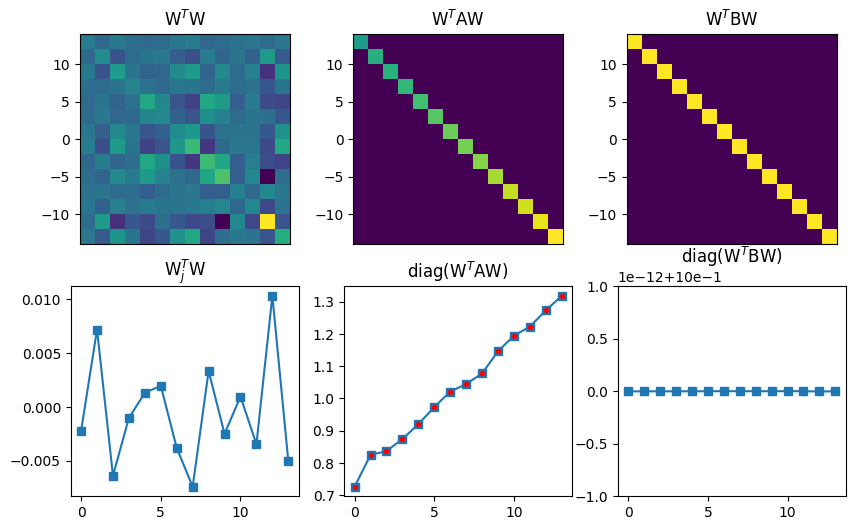

In [23]:
## some plotting

fig = plt.subplots(1,figsize=(10,6))

# W'W
plt.subplot(231)
plt.imshow(evecs.T@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$W')

# one row of W'W
tmp = evecs.T@evecs
plt.subplot(234)
plt.plot(tmp[1,:],'s-')
plt.title('W$_j^T$W')

# W'AW
plt.subplot(232)
plt.imshow(evecs.T@A@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$AW')

# one row of W'AW
plt.subplot(235)
plt.plot(np.diag(evecs.T@A@evecs),'s-')
plt.plot(evals,'r.')
plt.title('diag(W$^T$AW)')

# W'BW
plt.subplot(233)
plt.imshow(evecs.T@B@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$BW')

# diagonal of W'BW
plt.subplot(236)
plt.plot(np.diag(evecs.T@B@evecs),'s-')
plt.title('diag(W$^T$BW)')

plt.show()



---
VIDEO: Matrix definiteness, geometry, and eigenvalues
---


/var/folders/km/13wrqb_j6v3dc86n898dncd00000gn/T/ipykernel_3032/2505084821.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.zeros((5,), dtype=np.object)
/var/folders/km/13wrqb_j6v3dc86n898dncd00000gn/T/ipykernel_3032/2505084821.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


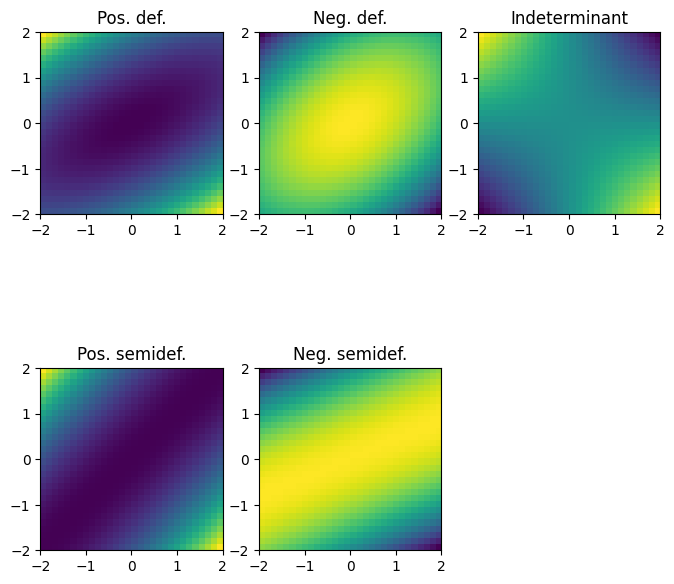

In [24]:
# some different matrices
S = np.zeros((5,), dtype=np.object)
S[0] = [ [ 4, 4], [ 4, 9] ]
S[1] = [ [-4,-1], [-3,-5] ]
S[2] = [ [ 0, 1], [ 2, 0] ]
S[3] = [ [ 1, 1], [ 1, 1] ]
S[4] = [ [-1,-2], [-3,-6] ]



# range for vector w
n = 30
wr = 2
wRange = np.linspace(-wr,wr,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )


fig = plt.subplots(1,figsize=(8,8))

for i in range(5):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map
    plt.subplot(2,3,i+1)
    plt.imshow(qf.T,extent=[-wr,wr,-wr,wr])
    
    ## compute the matrix's definiteness based on the eigenvalues
    
    # get eigenvalues
    evals = np.linalg.eig(S[i])[0]
    
    # we care about their signs
    esign = np.sign(evals)
    
    # test for signs (note: this test is valid only for 2x2 matrices!)
    if sum(esign)==2:
        defcat = 'Pos. def.'
    elif sum(esign)==1:
        defcat = 'Pos. semidef.'
    elif sum(esign)==0:
        defcat = 'Indeterminant'
    elif sum(esign)==-1:
        defcat = 'Neg. semidef.'
    elif sum(esign)==-2:
        defcat = 'Neg. def.'
    
    # add title
    plt.title(defcat)

plt.show()